# Data Science Final Project Report

In [1]:
library(tidyverse)
library(dplyr)
library(repr)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Introduction

### Background

Video games are increasingly being used as platforms for research, offering rich data on user behaviour in interactive environments. A research group at UBC has set up a customized Minecraft server to study how players interact with the game world, logging detailed information about each player's characteristics and in-game activity. These data can help address practical challenges such as server capacity planning and targeted participant recruitment by identifying patterns in user engagement. In this project, we use data from the Minecraft server to investigate whether player characteristics—specifically gender and gaming experience—can predict how many hours a player spends on the server. To conduct our analysis, we use R to wrangle, clean, and visualize the data, and apply appropriate statistical models to answer our predictive question. The findings may provide insights that support more efficient resource allocation and outreach efforts for the research team.

### Question

For this report, I decided to use question two as my guiding question, which is as follows:
        We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can
        target those players in our recruiting efforts.
From this question, I am interested in discovering if playing time (in hours) and age of a player can predict wether a player is subscribed, and if they can, use these predictions to help see which types of players are most likely to contribute the most data by being subscribed to minecraft and willing to pay to keep playing. I believe that age and playing time can be used ot predict subscription as they are two numerical variables that can be used as predictors by KNN classification.

### Data Description

The data set that was used to answer the question is from the file players.csv, and it contains 196 observations. It has 7 variables:
 ##### character data type
 - experience
 - hashedEmail
 - name
 - gender
##### double data type
- Age
- played_hours
##### logical data type
- subscribe

The variables needed for this analysis will be gender, played_hours, and Age. The Age variable describes the age of players, while the played_hours variable shows the time players spend in the game in hours. Finally, the subscribe variable describes whether a player is subscribed to the game or not. There are no issues with the variables I will be using; therefore, once I modify the data to contain only the variables I need, it will be ready to use in my analyses. The data set can be viewed below:

In [2]:
players_data <- read_csv("data/players.csv")
players_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


## Method

The first step of analysis is to load the data set into R, which was done above using the read_cvs function. The next step is to select only the columns of interest, which are Age, played_hours, and subscribe. This was done using the summarize function. Furthermore, once you reach above 10 hours, all players are subscribed no matter the age, therefore we filter for playing time only under 10 hours to get a better understanding of how age and played_hours BOTH impact subscription status (A graph with all the values would be bad for K nearest neighbor because the points are spaced badly due to scale).

In [3]:
players_data <- players_data |>
    select(Age, played_hours, subscribe) |>
    filter(played_hours<10) |>
    mutate(subscribe = as_factor(subscribe))

players_data

Age,played_hours,subscribe
<dbl>,<dbl>,<fct>
17,3.8,TRUE
17,0.0,FALSE
21,0.7,TRUE
21,0.1,TRUE
17,0.0,TRUE
19,0.0,TRUE
21,0.0,FALSE
17,0.1,TRUE
22,0.0,TRUE


The next step is to make a graph showing the relationship between the variables, and the best method was to make a scatterplot with age on the x axis and played_hours on the y axis, then colouring the points based on whether the player is subscribed or not. This was done using ggplot and geom_point, and I assigned the graph to an object called players_plot

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


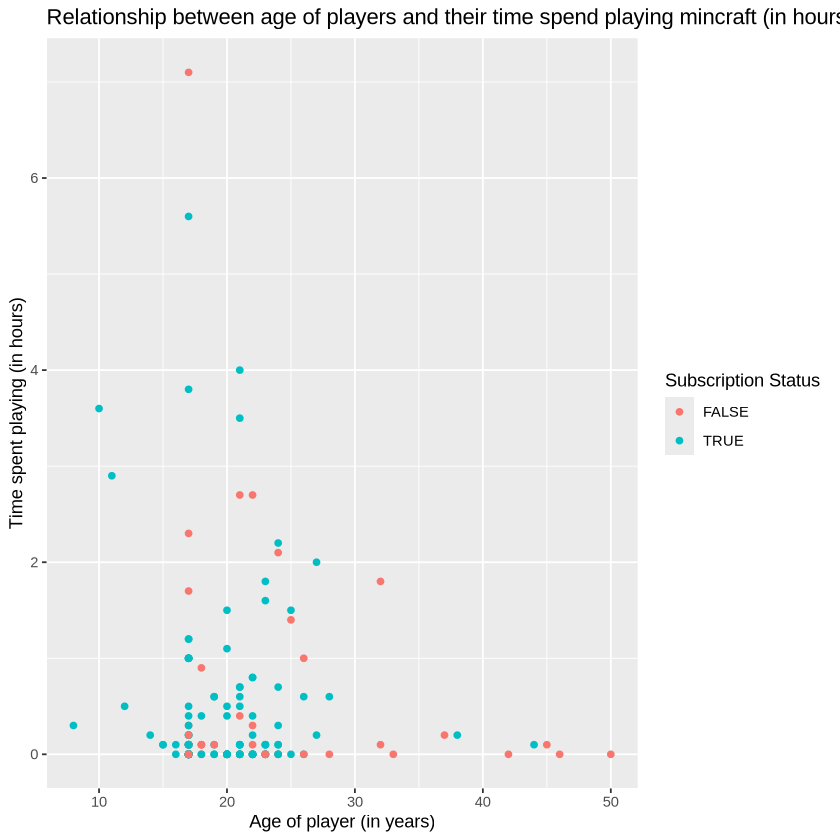

In [4]:
players_plot <- players_data |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point() +
    labs( x= "Age of player (in years)", y = "Time spent playing (in hours)", color = "Subscription Status") +
    ggtitle("Relationship between age of players and their time spend playing mincraft (in hours)")
players_plot

This initial visualization shows that age and playing time might not be very good at predicting subscription status, especially using KNN classification, as the points get very spread out at the top of the graph. This could prove to be an error once we implement the KNN classification algorithm. Something else we can see from this graph is that the relationship between the two variables is not linear, and doesnt seem to be very strong either.

Nex we will create two sample mean distributions of age and time spent playing to view some summary statistics of each variable.

#### Summary Statistics for Age

age_mean,age_med,age_sd
<dbl>,<dbl>,<dbl>
20.48066,19,5.892171


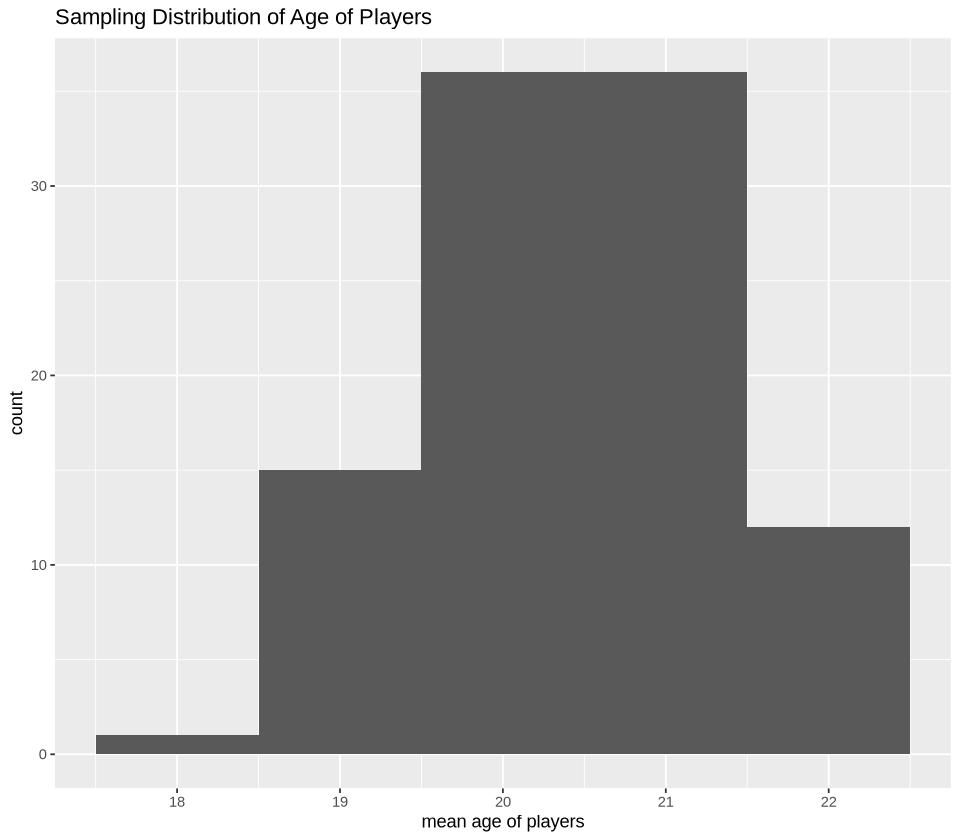

In [5]:
age_parameters <- players_data |>
    select(Age) |>
    filter(!is.na(Age)) |>
  summarize(age_mean = mean(Age), age_med = median(Age),age_sd = sd(Age))
age_parameters

set.seed(2022) 
sample_age <- players_data |>
    select(Age) |>
    filter(!is.na(Age)) |>
    rep_sample_n(size = 40, reps = 100)

sample_estimates <- sample_age |>
    group_by(replicate) |>
    summarize( mean_age = mean(Age))

options(repr.plot.width = 8, repr.plot.height = 7)
sampling_distribution <- sample_estimates |>
    ggplot(aes(x = mean_age)) +
    geom_histogram(binwidth = 1) +
    xlab("mean age of players") +
    ggtitle("Sampling Distribution of Age of Players")
sampling_distribution

As seen in this histogram plot, most players fall within the ages of 19-21, which is interesting to see. One thing that will be interesting to see with the analysis is how many of these players are actually subscribed.

#### Summary Statistics for Time Spent Playing

hours_mean,hours_med,hours_sd
<dbl>,<dbl>,<dbl>
0.4579235,0.1,0.9872985


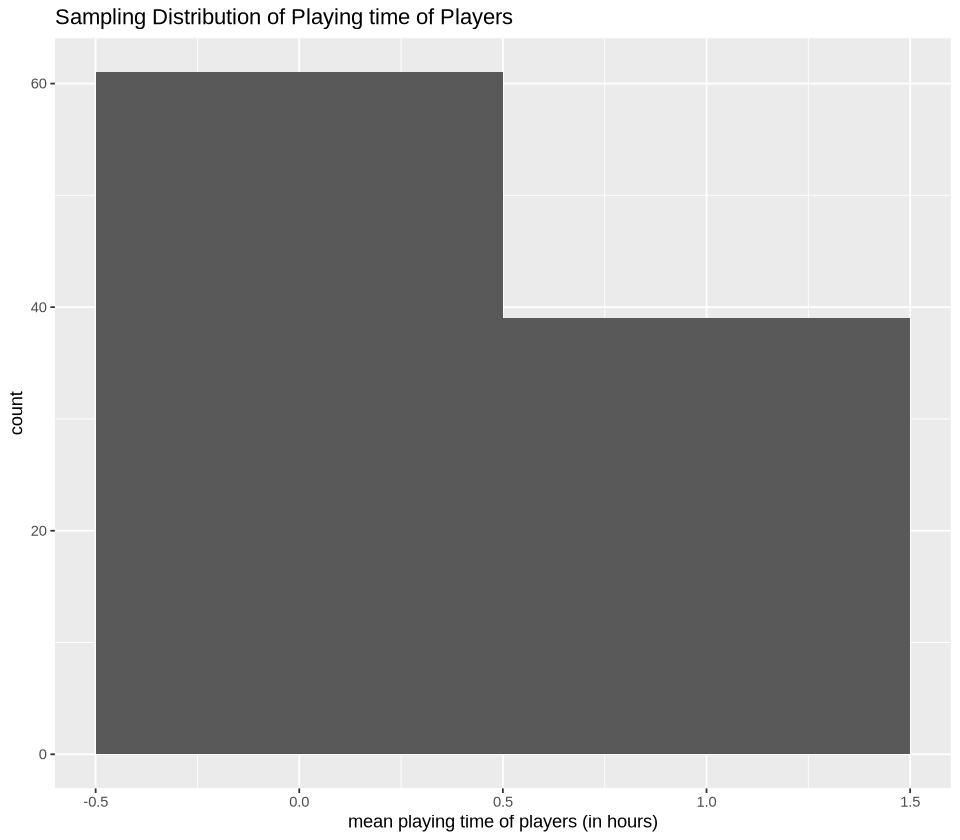

In [6]:
playing_parameters <- players_data |>
    select(played_hours) |>
    filter(!is.na(played_hours)) |>
  summarize(hours_mean = mean(played_hours), hours_med = median(played_hours),hours_sd = sd(played_hours))
playing_parameters

set.seed(2023) 
sample_play <- players_data |>
    select(played_hours) |>
    filter(!is.na(played_hours)) |>
    rep_sample_n(size = 40, reps = 100)

sample_estimate <- sample_play |>
    group_by(replicate) |>
    summarize( mean_hours = mean(played_hours))

options(repr.plot.width = 8, repr.plot.height = 7)
sampling_distribution_play <- sample_estimate |>
    ggplot(aes(x = mean_hours)) +
    geom_histogram(binwidth = 1) +
    xlab("mean playing time of players (in hours)") +
    ggtitle("Sampling Distribution of Playing time of Players")
sampling_distribution_play

This is a very interesting looking histogram plot and shows that the playing time does not have a vary varied distribution, as show that most players fall within two sets of playing time.

Now that a summary and visualization of the data have been made for exploratory data analysis, we can being creating the model. The first step is to set a seed so the results are reproducible. Then we split the data into a training and a testing set so we can evaluate how accurate our model is. We have to create a recipe and a model, then fit both to the data, and use cross validation and values of K ranging from 1-100, increasing by 5 to find the best one. We then pull the k value with the highest accuracy score to find which K value to use 

In [7]:
set.seed(2025)
players_split <- initial_split(players_data, prop = 0.75, strata = subscribe)
players_training <- training(players_split) |>
    filter(!is.na(Age))
players_testing <- testing(players_split) |>
    filter(!is.na(Age))

players_recipe <- recipe(subscribe ~ Age + played_hours, data = players_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

k_vals <- tibble(neighbors = seq(from = 1, to = 100, by = 5))

players_wrk <- workflow() |>
    add_recipe(players_recipe) |>
    add_model(players_spec) |>
    tune_grid(resample = players_vfold, grid = k_vals) |>
    collect_metrics()

accuracy_of_neighbors <- players_wrk |>
  filter(.metric == "accuracy")

best_k <- accuracy_of_neighbors |>
        arrange(desc(mean)) |>
        head(1) |>
        pull(neighbors)
best_k

    

[1] 21

Now that we have found the best K value, we can train our model using that K value on our training data, then test the model on our testing data to find how accurate it is.

In [8]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_training)

 players_predictions <- predict(knn_fit, players_testing) |>
    bind_cols(players_testing)
players_predictions

players_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

.pred_class,Age,played_hours,subscribe
<fct>,<dbl>,<dbl>,<fct>
TRUE,22,0.0,TRUE
TRUE,17,0.0,TRUE
TRUE,23,1.8,TRUE
TRUE,18,0.1,FALSE
FALSE,33,0.0,FALSE
TRUE,25,1.4,FALSE
TRUE,24,2.2,TRUE
TRUE,17,0.0,TRUE
TRUE,14,0.2,TRUE


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.75


Now that we have successfully shown the accuracy of our data, we can create a new observation and predict it using our workflow.  We can then make a visualization of the new observation to visually demonstrate the analysis we have performed, and see how well the prediction worked.

.pred_class
<fct>
FALSE


Warning message in geom_point(aes(x = 30, y = 0.5), color = "black", size = 4):
“All aesthetics have length 1, but the data has 183 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


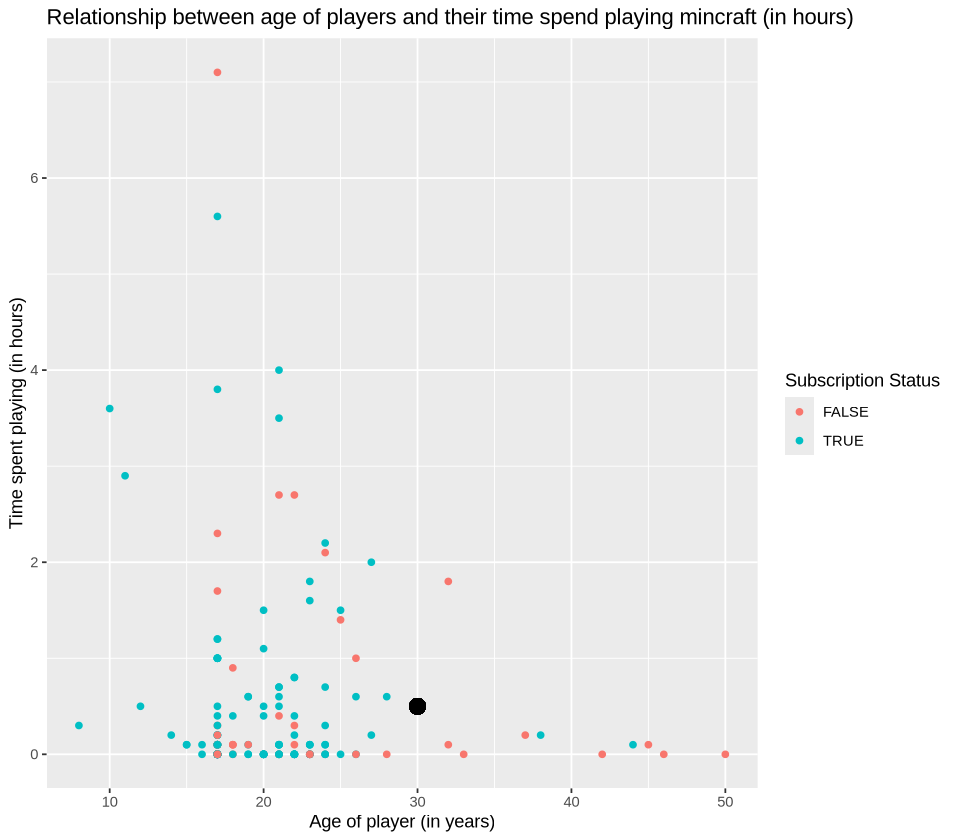

In [9]:
new_player <- tibble(Age = 30, played_hours = 0.5)
player_predicted <- predict(knn_fit, new_player)
player_predicted


players_plot + 
    geom_point(aes(x = 30, y = 0.5), color = "black", size = 4)

### Discussion

In conclusion, this analysis has shown that age and playing time can be used to predict the subscription status of a player, however, I would say KNN classification might not be the best algorithm to predict this data as the scatter plot shows that there are many more subscribed players, and therefore the model tended to predict too many observations in the test data as true. In the future, I would have maybe added data points for the FALSE subscription status to make the KNN classification algorithm have a better effect. Overall, the accuracy of the model was 75%, which is not horrible, and the best K was chosen to be 21. When a new observation was given for the model to predict, it did a pretty good job, and its prediction aligns well with where the point lies on the scatterplot, as seen above.

I would say that this conclusion is pretty similar to what I expected to find, as I predicted in the beginning that these two variables would be able to predict playing time; however, I was surprised that the accuracy of the model was a bit low even after tuning to find the best K.

I think the findings of this analysis could help the UBC computer science team in picking what demographic of age to pick for their studies, and cross-reference it with playing time to see what players are more likely to subscribe to the game and continue playing after the study. This could help them find players that are actually committed to continuing playing Minecraft; therefore, it answers the overarching problem of finding players that will keep giving the study the most amount of data.

This analysis might help develop new questions, such as patterns between the other two numerical variables and discover them through the KNN classification algorithm. Furthermore, researchers could look more into unsupervised methods of analysis, such as asking if there are any subgroups within the data provided in this analysis, which could be approached using k-means clustering algorithm.